In [35]:
import pandas as pd
import numpy as np
import nltk
import os
import nltk.corpus

In [36]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [37]:
#Tokenization
text = "Right-click on an element (or a blank area), and choose 'Inspect' or 'Inspect Element' to see what elements are made up of (you will see both the HTML and the CSS). You can also edit the HTML or CSS on-the-fly in the Elements or Styles panel that opens."
from nltk.tokenize import word_tokenize
def tokenization(text):
  tokens = word_tokenize(text)
  return tokens

In [38]:
tokens = tokenization(text)
tokens

['Right-click',
 'on',
 'an',
 'element',
 '(',
 'or',
 'a',
 'blank',
 'area',
 ')',
 ',',
 'and',
 'choose',
 "'Inspect",
 "'",
 'or',
 "'Inspect",
 'Element',
 "'",
 'to',
 'see',
 'what',
 'elements',
 'are',
 'made',
 'up',
 'of',
 '(',
 'you',
 'will',
 'see',
 'both',
 'the',
 'HTML',
 'and',
 'the',
 'CSS',
 ')',
 '.',
 'You',
 'can',
 'also',
 'edit',
 'the',
 'HTML',
 'or',
 'CSS',
 'on-the-fly',
 'in',
 'the',
 'Elements',
 'or',
 'Styles',
 'panel',
 'that',
 'opens',
 '.']

In [39]:
#Frecuencia de una palabra
from nltk.probability import FreqDist
def tokenFrecuency(tokens):
  fdist = FreqDist(tokens)
  return fdist

In [40]:
frecuencias = tokenFrecuency(tokens)
frecuencias

FreqDist({'or': 4, 'the': 4, '(': 2, ')': 2, 'and': 2, "'Inspect": 2, "'": 2, 'see': 2, 'HTML': 2, 'CSS': 2, ...})

In [41]:
#Encontrar los 10 más frecuentes
fdist1 = frecuencias.most_common(10)
fdist1

[('or', 4),
 ('the', 4),
 ('(', 2),
 (')', 2),
 ('and', 2),
 ("'Inspect", 2),
 ("'", 2),
 ('see', 2),
 ('HTML', 2),
 ('CSS', 2)]

In [42]:
#Stop words

from nltk import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
def stopWords(tokens):
  a = set(stopwords.words("english"))
  text1 = [x.lower() for x in tokens]
  sws = [x for x in text1 if x not in a]
  return sws

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
text

"Right-click on an element (or a blank area), and choose 'Inspect' or 'Inspect Element' to see what elements are made up of (you will see both the HTML and the CSS). You can also edit the HTML or CSS on-the-fly in the Elements or Styles panel that opens."

In [44]:
text_sw = stopWords(tokens)
text_sw

['right-click',
 'element',
 '(',
 'blank',
 'area',
 ')',
 ',',
 'choose',
 "'inspect",
 "'",
 "'inspect",
 'element',
 "'",
 'see',
 'elements',
 'made',
 '(',
 'see',
 'html',
 'css',
 ')',
 '.',
 'also',
 'edit',
 'html',
 'css',
 'on-the-fly',
 'elements',
 'styles',
 'panel',
 'opens',
 '.']

In [45]:
#Stemming Porter
from nltk.stem import PorterStemmer
def stemming(tokens):
  pst = PorterStemmer()
  text = []
  for word in tokens:
    text.append(pst.stem(word))
  return text


In [46]:
text

"Right-click on an element (or a blank area), and choose 'Inspect' or 'Inspect Element' to see what elements are made up of (you will see both the HTML and the CSS). You can also edit the HTML or CSS on-the-fly in the Elements or Styles panel that opens."

In [47]:
st = stemming(text_sw)
st

['right-click',
 'element',
 '(',
 'blank',
 'area',
 ')',
 ',',
 'choos',
 "'inspect",
 "'",
 "'inspect",
 'element',
 "'",
 'see',
 'element',
 'made',
 '(',
 'see',
 'html',
 'css',
 ')',
 '.',
 'also',
 'edit',
 'html',
 'css',
 'on-the-fli',
 'element',
 'style',
 'panel',
 'open',
 '.']

In [48]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
def lemmatization(tokens):
  lemmatizer = WordNetLemmatizer()
  text = []
  for word in tokens:
    text.append(lemmatizer.lemmatize(word))
  return text

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [49]:
lm = lemmatization(text_sw)
lm

['right-click',
 'element',
 '(',
 'blank',
 'area',
 ')',
 ',',
 'choose',
 "'inspect",
 "'",
 "'inspect",
 'element',
 "'",
 'see',
 'element',
 'made',
 '(',
 'see',
 'html',
 'cs',
 ')',
 '.',
 'also',
 'edit',
 'html',
 'cs',
 'on-the-fly',
 'element',
 'style',
 'panel',
 'open',
 '.']

In [50]:
nltk.download('averaged_perceptron_tagger')
def posTagging(tokens):
  tags = nltk.pos_tag(tokens)
  return tags

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [51]:
pos = posTagging(text_sw)
pos

[('right-click', 'JJ'),
 ('element', 'NN'),
 ('(', '('),
 ('blank', 'JJ'),
 ('area', 'NN'),
 (')', ')'),
 (',', ','),
 ('choose', 'JJ'),
 ("'inspect", 'POS'),
 ("'", 'POS'),
 ("'inspect", 'JJ'),
 ('element', 'NN'),
 ("'", 'POS'),
 ('see', 'NN'),
 ('elements', 'NNS'),
 ('made', 'VBN'),
 ('(', '('),
 ('see', 'VB'),
 ('html', 'RB'),
 ('css', 'NN'),
 (')', ')'),
 ('.', '.'),
 ('also', 'RB'),
 ('edit', 'VBP'),
 ('html', 'JJ'),
 ('css', 'JJ'),
 ('on-the-fly', 'JJ'),
 ('elements', 'NNS'),
 ('styles', 'NNS'),
 ('panel', 'NN'),
 ('opens', 'VBZ'),
 ('.', '.')]

In [52]:
from nltk import ne_chunk
nltk.download('maxent_ne_chunker')
nltk.download('words')
def namedEntityRecognition(tags):
  chunk = ne_chunk(tags)
  return chunk

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [53]:
!pip install svgling

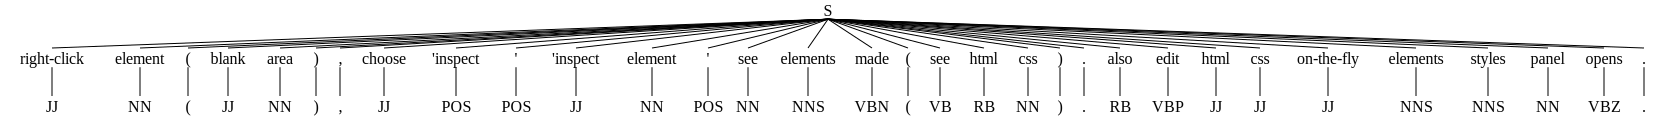

In [54]:
named = namedEntityRecognition(pos)
named

In [55]:
def chunking(tags):
  reg = "Persona: {<DT>?<JJ>*<NN>}"
  a = nltk.RegexpParser(reg)
  result = a.parse(tags)
  return result

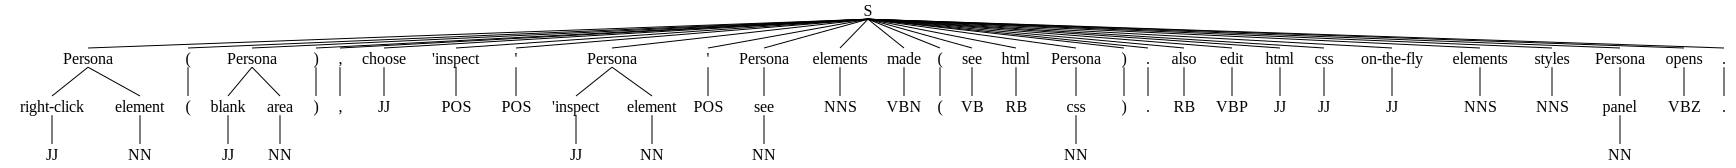

In [56]:
ch = chunking(pos)
ch

In [57]:
text = "Natural language processing (NLP) is a subfield of linguistics, computer science, information engineering, and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data. Challenges in natural language processing frequently involve speech recognition, natural language understanding, and natural language generation.”"
text

'Natural language processing (NLP) is a subfield of linguistics, computer science, information engineering, and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data. Challenges in natural language processing frequently involve speech recognition, natural language understanding, and natural language generation.”'

In [58]:
textTokens = tokenization(text)
textTokens

['Natural',
 'language',
 'processing',
 '(',
 'NLP',
 ')',
 'is',
 'a',
 'subfield',
 'of',
 'linguistics',
 ',',
 'computer',
 'science',
 ',',
 'information',
 'engineering',
 ',',
 'and',
 'artificial',
 'intelligence',
 'concerned',
 'with',
 'the',
 'interactions',
 'between',
 'computers',
 'and',
 'human',
 '(',
 'natural',
 ')',
 'languages',
 ',',
 'in',
 'particular',
 'how',
 'to',
 'program',
 'computers',
 'to',
 'process',
 'and',
 'analyze',
 'large',
 'amounts',
 'of',
 'natural',
 'language',
 'data',
 '.',
 'Challenges',
 'in',
 'natural',
 'language',
 'processing',
 'frequently',
 'involve',
 'speech',
 'recognition',
 ',',
 'natural',
 'language',
 'understanding',
 ',',
 'and',
 'natural',
 'language',
 'generation',
 '.',
 '”']

In [59]:
textFrecuency = tokenFrecuency(textTokens)
textFrecuency

FreqDist({',': 6, 'language': 5, 'natural': 5, 'and': 4, 'processing': 2, '(': 2, ')': 2, 'of': 2, 'computers': 2, 'in': 2, ...})

In [60]:
textTokens1 = stopWords(textTokens)
textTokens1

['natural',
 'language',
 'processing',
 '(',
 'nlp',
 ')',
 'subfield',
 'linguistics',
 ',',
 'computer',
 'science',
 ',',
 'information',
 'engineering',
 ',',
 'artificial',
 'intelligence',
 'concerned',
 'interactions',
 'computers',
 'human',
 '(',
 'natural',
 ')',
 'languages',
 ',',
 'particular',
 'program',
 'computers',
 'process',
 'analyze',
 'large',
 'amounts',
 'natural',
 'language',
 'data',
 '.',
 'challenges',
 'natural',
 'language',
 'processing',
 'frequently',
 'involve',
 'speech',
 'recognition',
 ',',
 'natural',
 'language',
 'understanding',
 ',',
 'natural',
 'language',
 'generation',
 '.',
 '”']

In [61]:
textTokens1 = stemming(textTokens1)
textTokens1

['natur',
 'languag',
 'process',
 '(',
 'nlp',
 ')',
 'subfield',
 'linguist',
 ',',
 'comput',
 'scienc',
 ',',
 'inform',
 'engin',
 ',',
 'artifici',
 'intellig',
 'concern',
 'interact',
 'comput',
 'human',
 '(',
 'natur',
 ')',
 'languag',
 ',',
 'particular',
 'program',
 'comput',
 'process',
 'analyz',
 'larg',
 'amount',
 'natur',
 'languag',
 'data',
 '.',
 'challeng',
 'natur',
 'languag',
 'process',
 'frequent',
 'involv',
 'speech',
 'recognit',
 ',',
 'natur',
 'languag',
 'understand',
 ',',
 'natur',
 'languag',
 'gener',
 '.',
 '”']

In [62]:
#Lemmatization
textTokens1 = lemmatization(textTokens1)
textTokens1

['natur',
 'languag',
 'process',
 '(',
 'nlp',
 ')',
 'subfield',
 'linguist',
 ',',
 'comput',
 'scienc',
 ',',
 'inform',
 'engin',
 ',',
 'artifici',
 'intellig',
 'concern',
 'interact',
 'comput',
 'human',
 '(',
 'natur',
 ')',
 'languag',
 ',',
 'particular',
 'program',
 'comput',
 'process',
 'analyz',
 'larg',
 'amount',
 'natur',
 'languag',
 'data',
 '.',
 'challeng',
 'natur',
 'languag',
 'process',
 'frequent',
 'involv',
 'speech',
 'recognit',
 ',',
 'natur',
 'languag',
 'understand',
 ',',
 'natur',
 'languag',
 'gener',
 '.',
 '”']

In [63]:
#POS Tagging
tags = posTagging(textTokens)
tags

[('Natural', 'JJ'),
 ('language', 'NN'),
 ('processing', 'NN'),
 ('(', '('),
 ('NLP', 'NNP'),
 (')', ')'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('subfield', 'NN'),
 ('of', 'IN'),
 ('linguistics', 'NNS'),
 (',', ','),
 ('computer', 'NN'),
 ('science', 'NN'),
 (',', ','),
 ('information', 'NN'),
 ('engineering', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('artificial', 'JJ'),
 ('intelligence', 'NN'),
 ('concerned', 'VBN'),
 ('with', 'IN'),
 ('the', 'DT'),
 ('interactions', 'NNS'),
 ('between', 'IN'),
 ('computers', 'NNS'),
 ('and', 'CC'),
 ('human', 'JJ'),
 ('(', '('),
 ('natural', 'JJ'),
 (')', ')'),
 ('languages', 'NNS'),
 (',', ','),
 ('in', 'IN'),
 ('particular', 'JJ'),
 ('how', 'WRB'),
 ('to', 'TO'),
 ('program', 'NN'),
 ('computers', 'NNS'),
 ('to', 'TO'),
 ('process', 'VB'),
 ('and', 'CC'),
 ('analyze', 'VB'),
 ('large', 'JJ'),
 ('amounts', 'NNS'),
 ('of', 'IN'),
 ('natural', 'JJ'),
 ('language', 'NN'),
 ('data', 'NNS'),
 ('.', '.'),
 ('Challenges', 'NNS'),
 ('in', 'IN'),
 ('natural', 'JJ'),


In [64]:
#Named entity recognition
chunk = namedEntityRecognition(tags)
print(chunk)

(S
  Natural/JJ
  language/NN
  processing/NN
  (/(
  (ORGANIZATION NLP/NNP)
  )/)
  is/VBZ
  a/DT
  subfield/NN
  of/IN
  linguistics/NNS
  ,/,
  computer/NN
  science/NN
  ,/,
  information/NN
  engineering/NN
  ,/,
  and/CC
  artificial/JJ
  intelligence/NN
  concerned/VBN
  with/IN
  the/DT
  interactions/NNS
  between/IN
  computers/NNS
  and/CC
  human/JJ
  (/(
  natural/JJ
  )/)
  languages/NNS
  ,/,
  in/IN
  particular/JJ
  how/WRB
  to/TO
  program/NN
  computers/NNS
  to/TO
  process/VB
  and/CC
  analyze/VB
  large/JJ
  amounts/NNS
  of/IN
  natural/JJ
  language/NN
  data/NNS
  ./.
  Challenges/NNS
  in/IN
  natural/JJ
  language/NN
  processing/NN
  frequently/RB
  involve/VBP
  speech/NN
  recognition/NN
  ,/,
  natural/JJ
  language/NN
  understanding/NN
  ,/,
  and/CC
  natural/JJ
  language/NN
  generation/NN
  ./.
  ”/VB)


In [65]:
#Chunking
chunkingTags = chunking(tags)
print(chunkingTags)

(S
  (Persona Natural/JJ language/NN)
  (Persona processing/NN)
  (/(
  NLP/NNP
  )/)
  is/VBZ
  (Persona a/DT subfield/NN)
  of/IN
  linguistics/NNS
  ,/,
  (Persona computer/NN)
  (Persona science/NN)
  ,/,
  (Persona information/NN)
  (Persona engineering/NN)
  ,/,
  and/CC
  (Persona artificial/JJ intelligence/NN)
  concerned/VBN
  with/IN
  the/DT
  interactions/NNS
  between/IN
  computers/NNS
  and/CC
  human/JJ
  (/(
  natural/JJ
  )/)
  languages/NNS
  ,/,
  in/IN
  particular/JJ
  how/WRB
  to/TO
  (Persona program/NN)
  computers/NNS
  to/TO
  process/VB
  and/CC
  analyze/VB
  large/JJ
  amounts/NNS
  of/IN
  (Persona natural/JJ language/NN)
  data/NNS
  ./.
  Challenges/NNS
  in/IN
  (Persona natural/JJ language/NN)
  (Persona processing/NN)
  frequently/RB
  involve/VBP
  (Persona speech/NN)
  (Persona recognition/NN)
  ,/,
  (Persona natural/JJ language/NN)
  (Persona understanding/NN)
  ,/,
  and/CC
  (Persona natural/JJ language/NN)
  (Persona generation/NN)
  ./.
  ”/